In [109]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from nltk.corpus import stopwords

import nltk

nltk.download('vader_lexicon')
from nltk.sentiment import SentimentIntensityAnalyzer
from wordcloud import WordCloud

import string
from functools import reduce

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     /Users/andrey/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [110]:
#скорочення слів до їх основи або кореневої форми
porter = PorterStemmer()

In [111]:
# Зчитування текстового файлу.
def read_text(path):
    with open(path, 'r') as file:
        return file.read()

In [112]:
doyle = read_text('doyle.txt')
doyle += read_text('doyle-2.txt')
poe = read_text('poe.txt')
poe += read_text('poe-2.txt')

In [113]:
# Повертає функцію для видалення заданих стоп-слів.
def get_stopwords_remover(stop_words):
    return lambda words: [word for word in words if not word.lower() in stop_words]
#список стоп-слів
stop_words = set(stopwords.words('english'))
remove_stopwords = get_stopwords_remover(stop_words)

In [114]:
# Видалення знаків пунктуації.
def clear_punctuation(text):
    return text.translate(str.maketrans('', '', string.punctuation))

# Виконати стемізацію методом Портера.
def porter_stem(words):
    return [porter.stem(word) for word in words]

# Функція для об'єднання етапів обробки в єдиний конвеєр.
def preprocessing_pipeline(steps):
    return lambda raw_text: reduce(lambda data, func: func(data), steps, raw_text)

In [115]:
#Видалення пунктуації з тексту, токенізація та видалення стоп-слів
pipe = preprocessing_pipeline([
    clear_punctuation,
    word_tokenize,
    remove_stopwords
])
doyle_words = pipe(doyle)
poe_words = pipe(poe)

In [116]:
#Додамо додаткові стоп-слова та видалимо їх
custom_stopwords = {'upon', 'one', 'said', 'could', 'would', 'us', 'man', 'mr', 'de'}
remove_custom_stopwords = get_stopwords_remover(custom_stopwords)
doyle_words = remove_custom_stopwords(doyle_words)
poe_words = remove_custom_stopwords(poe_words)

In [117]:
#список слів з їх частотами
def word_list_to_freq_dict(wordlist):
    res = {}
    for word in wordlist:
        if word not in res:
            res[word] = 1
        else:
            res[word] += 1
    return res
doyle_words_freq = word_list_to_freq_dict(doyle_words)
poe_words_freq = word_list_to_freq_dict(poe_words)

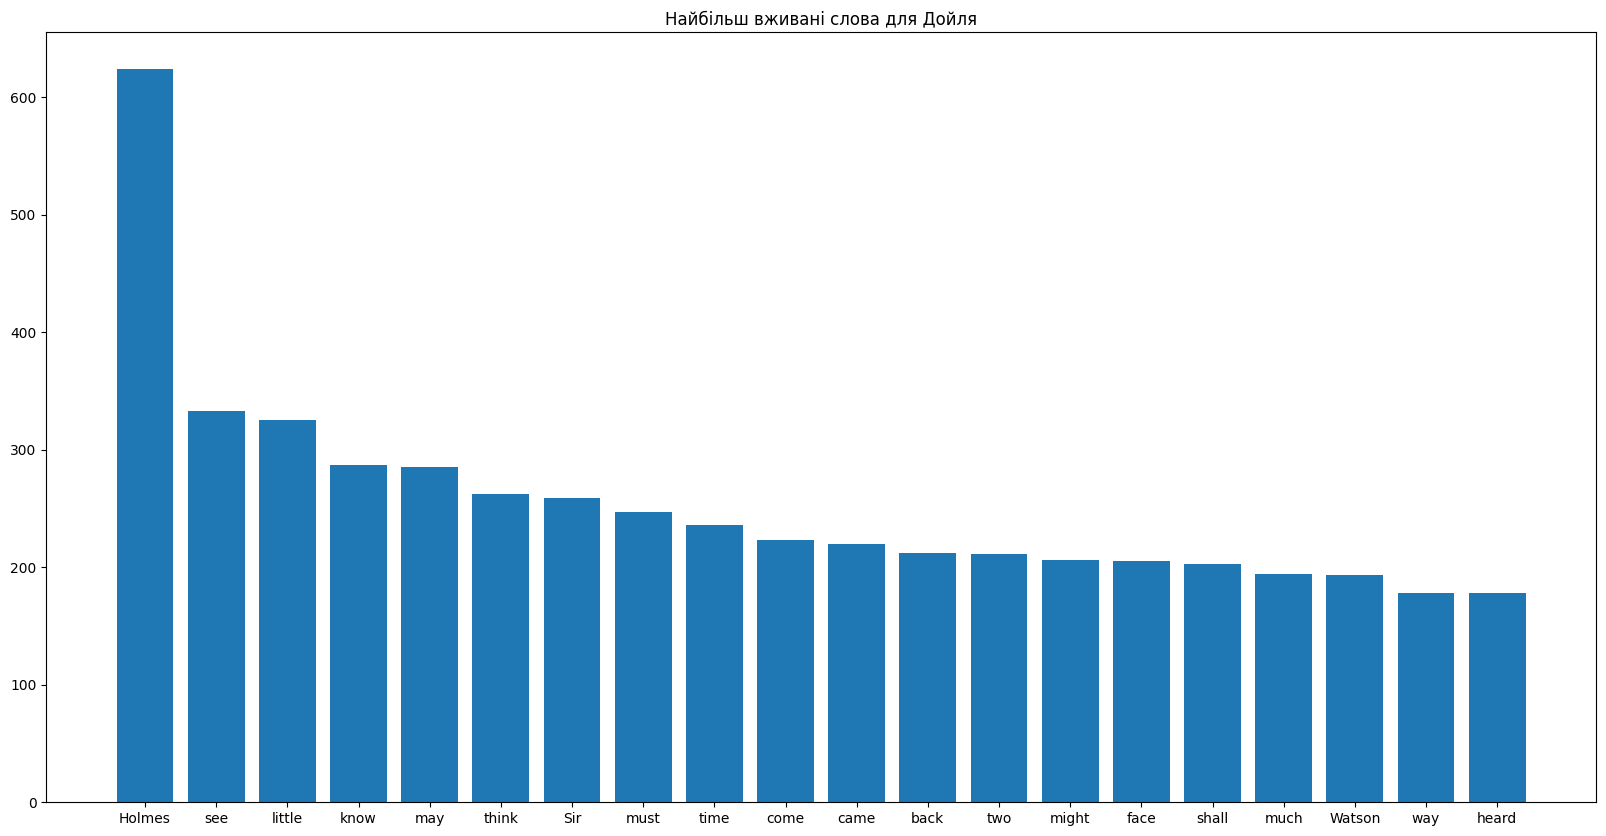

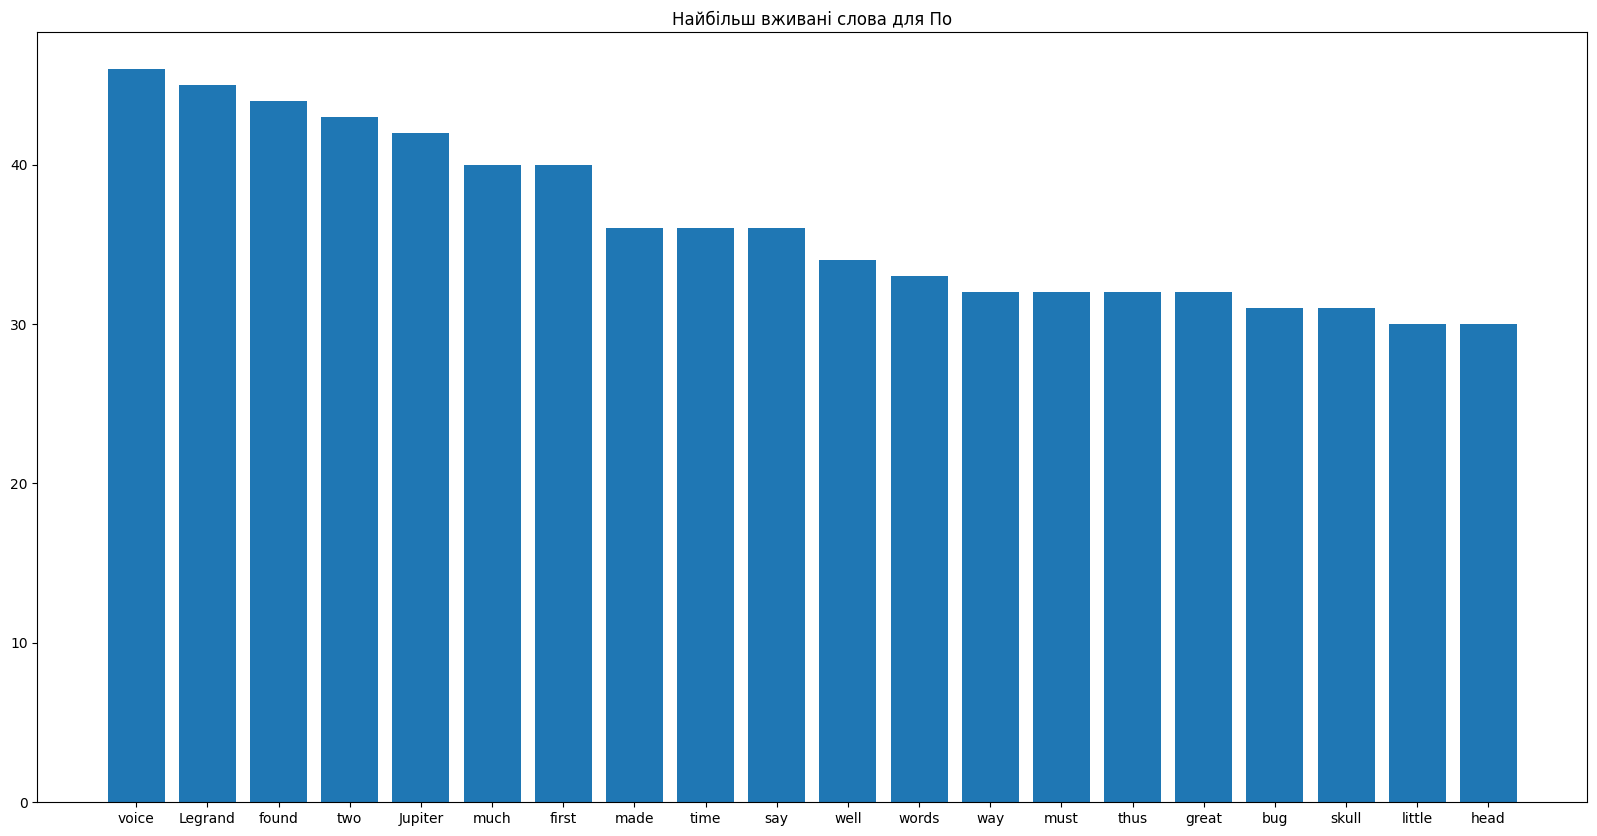

In [118]:
#графік найбільш вживаних слів
doyle_words_freq_arr = np.array(sorted(doyle_words_freq.items(), key=lambda item: -item[1])).T
poe_words_freq_arr = np.array(sorted(poe_words_freq.items(), key=lambda item: -item[1])).T
n = 20 # кількість слів
plt.figure(figsize=(20, 10))
plt.title('Найбільш вживані слова для Дойля')
plt.bar(doyle_words_freq_arr[0][:n], doyle_words_freq_arr[1][:n].astype(int))

plt.figure(figsize=(20, 10))
plt.title('Найбільш вживані слова для По')
plt.bar(poe_words_freq_arr[0][:n], poe_words_freq_arr[1][:n].astype(int))

plt.show()

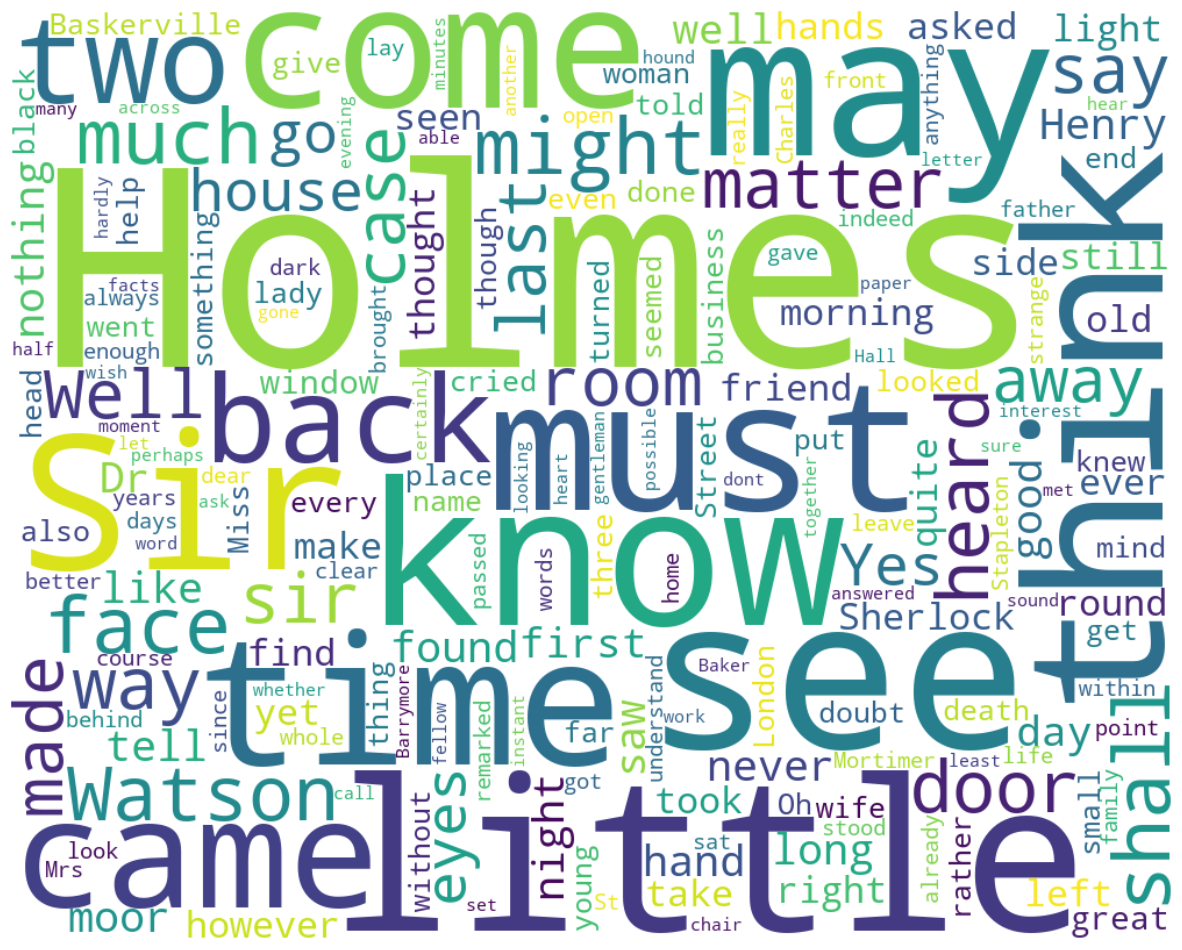

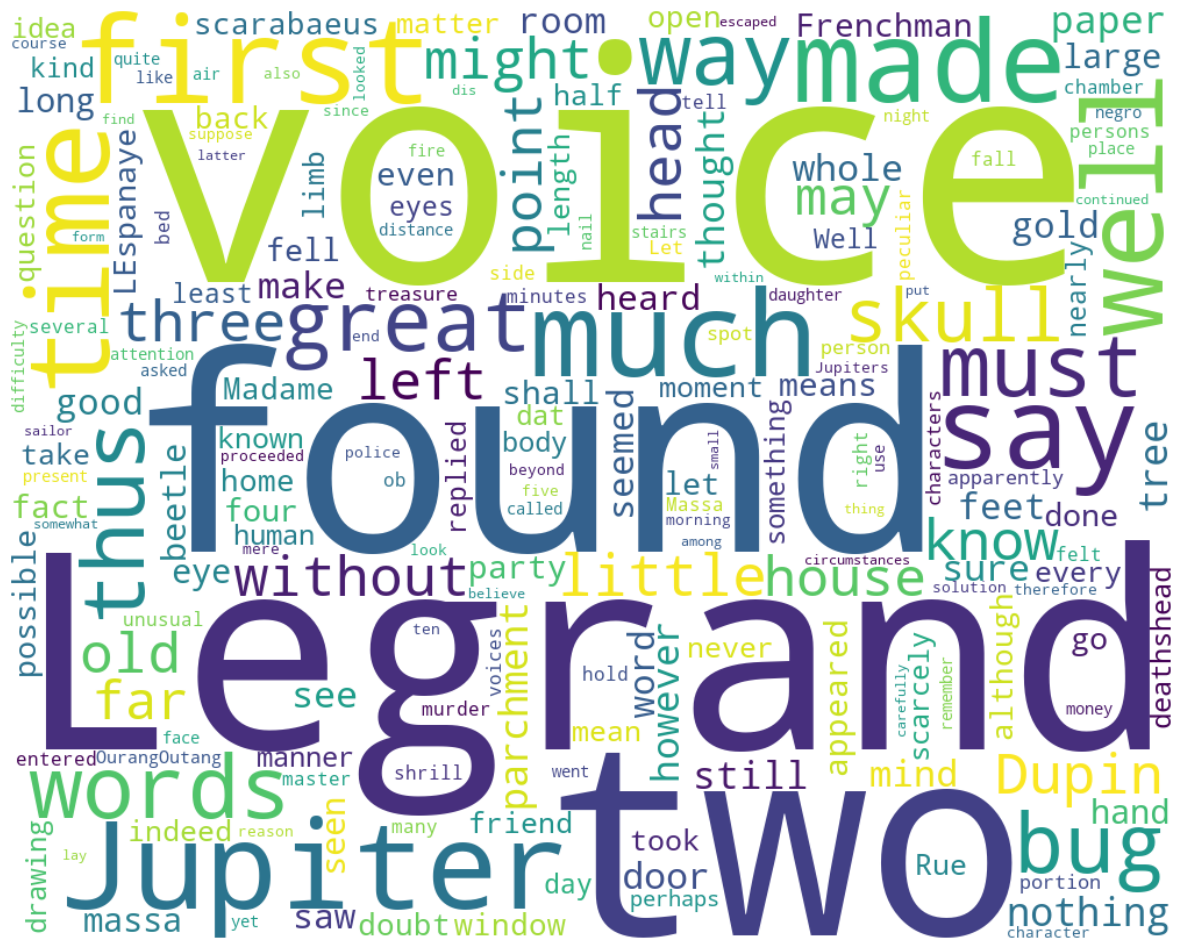

In [119]:
#Будуємо хмари слів
wordcloud = WordCloud(
    background_color='white',
    width=1000, height=800
)
doyle_cloud = wordcloud.generate_from_frequencies(word_list_to_freq_dict(doyle_words))

plt.figure(figsize=(15, 15))
plt.imshow(doyle_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

doyle_cloud = wordcloud.generate_from_frequencies(word_list_to_freq_dict(poe_words))

plt.figure(figsize=(15, 15))
plt.imshow(doyle_cloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [121]:
# Аналіз тексту Дойля
sia_doyle = SentimentIntensityAnalyzer()
sentimental_doyle = sia_doyle.polarity_scores(" ".join(doyle_words))
print('Compound sentiment score Doyle: ', sentimental_doyle)

# Аналіз тексту "По"
sia_poe = SentimentIntensityAnalyzer()
sentimenta_poe = sia_poe.polarity_scores(" ".join(poe_words))
print('Compound sentiment score Poe: ',sentimenta_poe)


Compound sentiment score Doyle:  {'neg': 0.135, 'neu': 0.682, 'pos': 0.183, 'compound': 1.0}
Compound sentiment score Poe:  {'neg': 0.126, 'neu': 0.712, 'pos': 0.162, 'compound': 0.9999}
